In [1]:

import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

sd = pd.read_csv("suicide_rate_data.csv")
names_df = pd.read_csv("country_names.csv")

# country_names = [names]
# country_name_list = ["Argentina", "Austria", "Belgium", "Brazil", "Chile", "Colombia", "Ecuador",
#                        "Greece", "Iceland", "Israel", "Italy", "Japan", "Luxembourg", "Malta", "Mauritius",
#                        "Mexico", "Netherlands", "Puerto Rico", "Republic of Korea", "Singapore",
#                        "Spain", "United Kingdom", "United States"]

#del sd["HDI for year"]

countries = sd[sd["country"].isin(names_df['country'])]
countries.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Unnamed: 12,country.1
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,88416668900,3264,G.I. Generation,NaN,NaN
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,88416668900,3264,G.I. Generation,NaN,NaN
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,88416668900,3264,Silent,NaN,NaN
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,88416668900,3264,G.I. Generation,NaN,NaN
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,88416668900,3264,Boomers,NaN,NaN


In [2]:
countries['gdp_for_year_B']=(countries[' gdp_for_year ($) ']/1000000000).round(2)
countries.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Unnamed: 12,country.1,gdp_for_year_B
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,88416668900,3264,G.I. Generation,NaN,NaN,88.42
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,88416668900,3264,G.I. Generation,NaN,NaN,88.42
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,88416668900,3264,Silent,NaN,NaN,88.42
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,88416668900,3264,G.I. Generation,NaN,NaN,88.42
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,88416668900,3264,Boomers,NaN,NaN,88.42


In [3]:
countries.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'Unnamed: 12',
       'country.1', 'gdp_for_year_B'],
      dtype='object')

In [4]:
grouped_country = countries.groupby(['country'])
total_by_country = grouped_country['suicides_no'].sum()
#total_by_country[].sort()
#gapminder.sort_values(['gdpPercap','lifeExp'])
#.sort_values(['country','suicides_no']).apply()
total_by_country

country
Argentina              82219
Austria                50073
Belgium                62761
Brazil                226613
Chile                  40895
Colombia               53080
Ecuador                20660
Greece                 12368
Iceland                 1108
Israel                 11294
Italy                 132060
Japan                 806902
Luxembourg              1958
Malta                    585
Mauritius               3894
Mexico                111139
Netherlands            50833
Puerto Rico             9043
Republic of Korea     261730
Singapore              10089
Spain                 100202
United Kingdom        136805
United States        1034013
Name: suicides_no, dtype: int64

In [5]:
sex_by_country = countries.groupby(['country','sex'])
sex_by_country['suicides_no', 'population'].sum()

suicides_no  population
country           sex                            
Argentina         female        18326   529728151
                  male          63893   506257280
Austria           female        13195   126313508
                  male          36878   117539586
Belgium           female        18012   155261032
                  male          44749   148041589
Brazil            female        49015  2465480125
                  male         177598  2390613423
Chile             female         6834   216735665
                  male          34061   210889427
Colombia          female        11343   561754006
                  male          41737   546187960
Ecuador           female         6238   172110791
                  male          14422   172217199
Greece            female         2540   160510831
                  male           9828   155585274
Iceland           female          255     4187932
                  male            853     4219972
Israel            female         2681    87746450
                  male           8613    85325338
Italy             female        32881   885613658
                  male          99179   829430046
Japan             female       251630  1884787499
                  male         555272  1796237345
Luxembourg        female          542     6577184
                  male           1416     6375972
Malta             female          110     5675766
                  male            475     5551637
Mauritius         female          995    16846998
                  male           2899    16564911
Mexico            female        19334  1397570687
                  male          91805  1375388472
Netherlands       female        16886   240739280
                  male          33947   234621989
Puerto Rico       female         1054    54807780
                  male           7989    50578845
Republic of Korea female        82615   676949213
                  male         179115   677995723
Singapore         female         3793    47328399
                  male           6296    46914042
Spain             female        24669   626333288
                  male          75533   601327807
United Kingdom    female        32687   889502064
                  male         104118   849265716
United States     female       213797  4113698286
                  male         820216  3940328915

In [112]:
#get the GDP per country

country_2015 = countries.loc[countries['year'] == 2015]
grouped_country = country_2015.groupby(['country'])
gdp_by_country = grouped_country['gdp_for_year_B'].mean()

gdp_by_country


country
Argentina              594.75
Austria                382.07
Belgium                455.04
Brazil                1802.21
Chile                  244.00
Colombia               291.52
Ecuador                 99.29
Greece                 195.54
Iceland                 16.94
Israel                 299.09
Italy                 1832.87
Japan                 4394.98
Luxembourg              57.78
Malta                   10.57
Mauritius               11.69
Mexico                1169.62
Netherlands            758.00
Puerto Rico            103.14
Republic of Korea     1382.76
Singapore              304.10
Spain                 1197.79
United Kingdom        2885.57
United States        18120.70
Name: gdp_for_year_B, dtype: float64

In [113]:
# get the suicide rate per country

country_2015 = countries.loc[countries['year'] == 2015]
grouped_country = country_2015.groupby(['country'])
suicides_by_country = grouped_country['suicides/100k pop'].mean()

suicides_by_country


country
Argentina             9.344167
Austria              16.218333
Belgium              16.388333
Brazil                6.454167
Chile                12.306667
Colombia              5.866667
Ecuador               8.115833
Greece                4.671667
Iceland              11.720833
Israel                5.492500
Italy                 6.537500
Japan                17.170000
Luxembourg           11.200000
Malta                 6.522500
Mauritius             8.330833
Mexico                5.547500
Netherlands          10.577500
Puerto Rico           7.131667
Republic of Korea    32.428333
Singapore             9.107500
Spain                 8.115000
United Kingdom        7.228333
United States        14.617500
Name: suicides/100k pop, dtype: float64

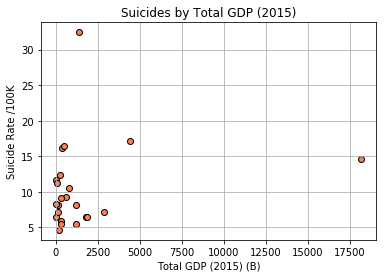

In [140]:
# this is the suicide rate and GDP in 2015:

plt.scatter(gdp_by_country, 
            suicides_by_country, 
            color = "coral", 
            edgecolors = "black",  
            alpha = 1.0, 
            linewidth = 1.0)

# Incorporate the other graph properties
plt.title("Suicides by Total GDP (2015)")
plt.xlabel("Total GDP (2015) (B)")
plt.ylabel("Suicide Rate /100K")
plt.grid()

plt.savefig("Output/Suicides_by_Total_GDP_(2015).png")


In [9]:
#get the GDP per capita per country

country_2015 = countries.loc[countries['year'] == 2015]
grouped_country_pc = country_2015.groupby(['country'])
gdp_by_country_pc = grouped_country_pc['gdp_per_capita ($)'].mean()

gdp_by_country_pc

country
Argentina             14981
Austria               46484
Belgium               42830
Brazil                 9431
Chile                 14729
Colombia               6552
Ecuador                6832
Greece                18927
Iceland               54909
Israel                39793
Italy                 31537
Japan                 36510
Luxembourg           107456
Malta                 25750
Mauritius             10125
Mexico                10228
Netherlands           47206
Puerto Rico           29728
Republic of Korea     28410
Singapore             81766
Spain                 27108
United Kingdom        47240
United States         60387
Name: gdp_per_capita ($), dtype: int64

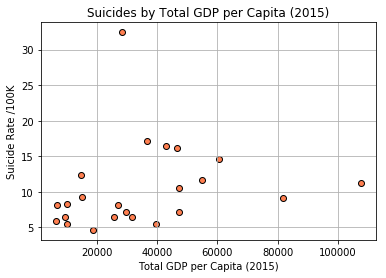

In [141]:
# this is the suicide rate and GDP per capita in 2015:

plt.scatter(gdp_by_country_pc, 
            suicides_by_country, 
            color = "coral", 
            edgecolors = "black",  
            alpha = 1.0, 
            linewidth = 1.0)

# Incorporate the other graph properties
plt.title("Suicides by Total GDP per Capita (2015)")
plt.xlabel("Total GDP per Capita (2015)")
plt.ylabel("Suicide Rate /100K")
plt.grid()

plt.savefig("Output/Suicides_by_Total_GDP_per_Capita(2015).png")


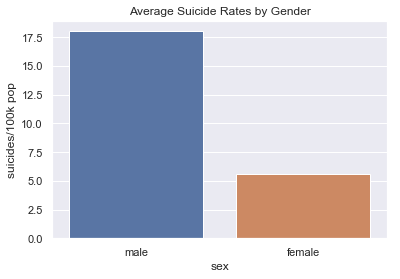

In [154]:
# this is the difference between male and female:

sns.barplot(x = 'sex', y = 'suicides/100k pop', data = countries, ci=None)
plt.title("Average Suicide Rates by Gender")

plt.savefig("Output/Avg_Suicides_by_Gender.png")



In [12]:
grouped_years = countries.groupby(['year', 'sex'])

total_by_years = grouped_years['suicides/100k pop'].mean()

gy = pd.DataFrame(total_by_years)

gy


suicides/100k pop
year sex                      
1985 female           6.928696
     male            19.213841
1986 female           7.051522
     male            18.279783
1987 female           7.250652
     male            18.612536
1988 female           6.509783
     male            19.393841
1989 female           6.932536
     male            18.973406
1990 female           6.116739
     male            18.164710
1991 female           5.757174
     male            18.890435
1992 female           5.905290
     male            17.542536
1993 female           5.556667
     male            18.212391
1994 female           5.498261
     male            18.927029
1995 female           5.653841
     male            18.294638
1996 female           5.407464
     male            18.396522
1997 female           5.152826
     male            18.856594
1998 female           5.573623
     male            18.379855
1999 female           5.293043
     male            17.975072
...                        ...
2002 female           5.620507
     male            17.947464
2003 female           5.127029
     male            18.152174
2004 female           5.536522
     male            18.471449
2005 female           5.211377
     male            18.011087
2006 female           5.180942
     male            17.495870
2007 female           5.385942
     male            17.524493
2008 female           4.931304
     male            16.884275
2009 female           5.142971
     male            17.799565
2010 female           4.902391
     male            18.023768
2011 female           5.059420
     male            16.853623
2012 female           5.029130
     male            16.921232
2013 female           4.945652
     male            16.538696
2014 female           4.873768
     male            16.898406
2015 female           4.917464
     male            16.047174
2016 female           5.270500
     male            22.129000

[64 rows x 1 columns]

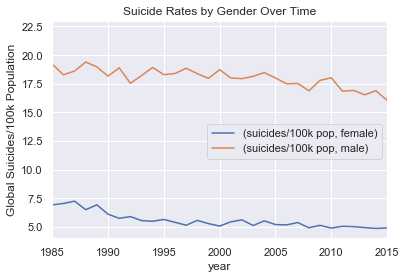

In [152]:
# this is the difference between male and female over time:

gy.unstack().plot(legend=True, xlim=[1985, 2015])
plt.title("Suicide Rates by Gender Over Time")
plt.ylabel("Global Suicides/100k Population")
sns.set(style="darkgrid")
plt.legend(loc="upper right", bbox_to_anchor=(1,.55))

plt.savefig("Output/Suicides_by_Gender_Over_Time.png")


In [14]:
grouped_years_age = countries.groupby(['year', 'age'])

total_by_years_age = grouped_years_age['suicides/100k pop'].mean()

gy_age = pd.DataFrame(total_by_years_age)

gy_age

suicides/100k pop
year age                           
1985 15-24 years           7.676522
     25-34 years          10.373043
     35-54 years          12.565000
     5-14 years            0.551304
     55-74 years          17.325652
     75+ years            29.936087
1986 15-24 years           7.073913
     25-34 years          10.774783
     35-54 years          12.139783
     5-14 years            0.375435
     55-74 years          16.720217
     75+ years            28.909783
1987 15-24 years           7.706739
     25-34 years          10.964130
     35-54 years          12.543696
     5-14 years            0.453261
     55-74 years          17.598913
     75+ years            28.322826
1988 15-24 years           7.914565
     25-34 years          11.660652
     35-54 years          13.056087
     5-14 years            0.393043
     55-74 years          16.254565
     75+ years            28.431957
1989 15-24 years           8.087174
     25-34 years          11.075870
     35-54 years          12.193913
     5-14 years            0.618696
     55-74 years          15.758913
     75+ years            29.983261
...                             ...
2011 75+ years            20.329783
2012 15-24 years           7.729783
     25-34 years          10.596522
     35-54 years          12.488043
     5-14 years            0.537174
     55-74 years          13.971739
     75+ years            20.527826
2013 15-24 years           7.299348
     25-34 years           9.708261
     35-54 years          12.490652
     5-14 years            0.612826
     55-74 years          13.417826
     75+ years            20.924130
2014 15-24 years           7.719348
     25-34 years          10.452391
     35-54 years          12.631739
     5-14 years            0.728696
     55-74 years          13.358696
     75+ years            20.425652
2015 15-24 years           7.659130
     25-34 years          10.101739
     35-54 years          12.166957
     5-14 years            0.557609
     55-74 years          13.528261
     75+ years            18.880217
2016 15-24 years           9.250000
     25-34 years          12.738750
     35-54 years          13.012500
     55-74 years          15.246250
     75+ years            18.251250

[191 rows x 1 columns]

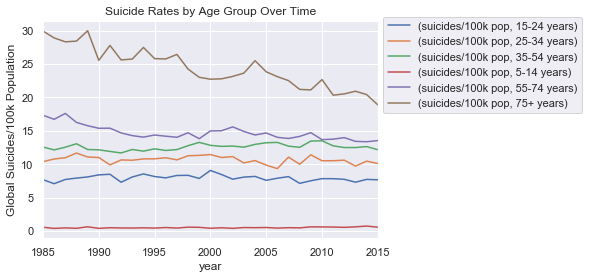

In [155]:
# this is the difference between age groups over time:

gy_age.unstack().plot(xlim = [1985, 2015])
plt.title("Suicide Rates by Age Group Over Time")
sns.set(style="darkgrid")
plt.ylabel("Global Suicides/100k Population")
plt.legend(loc="best", bbox_to_anchor=(1,.55))
plt.savefig("Output/Suicides_by_Age_Group_Over_Time.png")


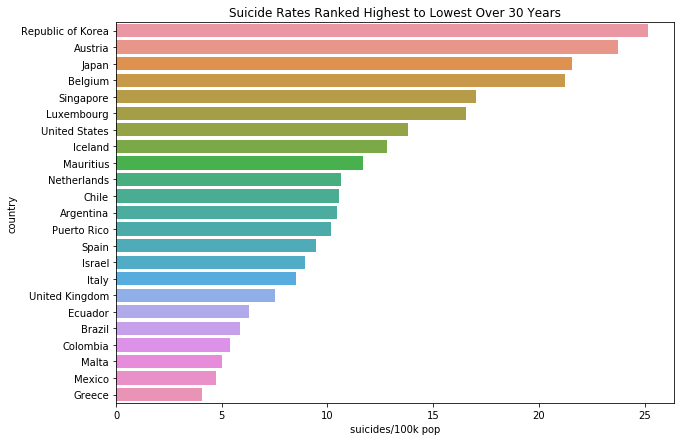

In [150]:
suicide_country_groupby = countries.groupby(['country'])['suicides/100k pop'].mean()
y = pd.DataFrame(suicide_country_groupby.sort_values(ascending=False))
country_order = ['Republic of Korea','Austria','Japan','Belgium',
                 'Singapore','Luxembourg','United States','Iceland',
                 'Mauritius','Netherlands','Chile','Argentina','Puerto Rico',
                 'Spain','Israel','Italy','United Kingdom','Ecuador','Brazil','Colombia','Malta','Mexico','Greece']

sort_by_amt = countries.sort_values(by=['suicides/100k pop'], ascending=False)
plt.figure(figsize=(10, 7))
sns.barplot(x = 'suicides/100k pop', y = 'country', data = sort_by_amt, order=country_order, ci=None)
plt.title("Suicide Rates Ranked Highest to Lowest Over 30 Years")
plt.savefig("Output/Suicides_Ranked_High_Low.png")


In [94]:
#country_top5 = ['Republic of Korea','Austria','Japan','Belgium','Singapore']

grouped_years_top5 = countries.groupby(['country', 'year'])

total_by_years_top5 = grouped_years_top5 ['suicides/100k pop'].mean()

gy_top5 = pd.DataFrame(total_by_years_top5)

gy_top5


suicides/100k pop
country       year                   
Argentina     1985          11.205833
              1986          12.741667
              1987          12.081667
              1988          12.186667
              1989          11.577500
              1990          11.241667
              1991           9.936667
              1992          10.571667
              1993          11.230833
              1994          10.170833
              1995           9.997500
              1996           9.835833
              1997           9.283333
              1998           9.744167
              1999           9.765833
              2000          10.949167
              2001          11.963333
              2002          11.618333
              2003          12.190833
              2004          10.921667
              2005          10.681667
              2006          10.685000
              2007           9.862500
              2008           9.842500
              2009           8.943333
              2010           9.270000
              2011           8.822500
              2012           9.985000
              2013           8.618333
              2014           9.279167
...                               ...
United States 1986          15.970833
              1987          15.971667
              1988          15.642500
              1989          15.203333
              1990          15.650000
              1991          15.314167
              1992          14.814167
              1993          14.926667
              1994          14.669167
              1995          14.424167
              1996          13.870833
              1997          13.496667
              1998          13.375833
              1999          12.564167
              2000          12.215000
              2001          12.351667
              2002          12.501667
              2003          12.136667
              2004          12.241667
              2005          12.223333
              2006          12.094167
              2007          12.426667
              2008          12.770000
              2009          12.849167
              2010          13.240833
              2011          13.530000
              2012          13.761667
              2013          13.889167
              2014          14.277500
              2015          14.617500

[717 rows x 1 columns]

In [99]:
top_5_countries = countries[countries.country.isin(['Republic of Korea','Austria','Japan','Belgium','Singapore'])]
top_5_countries

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Unnamed: 12,country.1,gdp_for_year_B
1786,Austria,1985,male,75+ years,152,156535,97.10,Austria1985,0.764,69386774475,9759,G.I. Generation,NaN,NaN,69.39
1787,Austria,1985,male,55-74 years,355,584253,60.76,Austria1985,0.764,69386774475,9759,G.I. Generation,NaN,NaN,69.39
1788,Austria,1985,male,35-54 years,515,940526,54.76,Austria1985,0.764,69386774475,9759,Silent,NaN,NaN,69.39
1789,Austria,1985,male,25-34 years,232,548783,42.28,Austria1985,0.764,69386774475,9759,Boomers,NaN,NaN,69.39
1790,Austria,1985,female,75+ years,110,339223,32.43,Austria1985,0.764,69386774475,9759,G.I. Generation,NaN,NaN,69.39
1791,Austria,1985,male,15-24 years,207,653728,31.66,Austria1985,0.764,69386774475,9759,Generation X,NaN,NaN,69.39
1792,Austria,1985,female,55-74 years,220,842978,26.10,Austria1985,0.764,69386774475,9759,G.I. Generation,NaN,NaN,69.39
1793,Austria,1985,female,35-54 years,186,936799,19.85,Austria1985,0.764,69386774475,9759,Silent,NaN,NaN,69.39
1794,Austria,1985,female,25-34 years,56,544765,10.28,Austria1985,0.764,69386774475,9759,Boomers,NaN,NaN,69.39
1795,Austria,1985,female,15-24 years,50,633592,7.89,Austria1985,0.764,69386774475,9759,Generation X,NaN,NaN,69.39


In [100]:
grouped_top5 = top_5_countries.groupby(['year','country'])

total_top5 = grouped_top5 ['suicides/100k pop'].mean()

gy_top5 = pd.DataFrame(total_top5)

gy_top5

suicides/100k pop
year country                             
1985 Austria                    32.067500
     Belgium                    27.670000
     Japan                      25.039167
     Republic of Korea          12.220833
     Singapore                  29.446667
1986 Austria                    33.483333
     Belgium                    26.224167
     Japan                      26.962500
     Republic of Korea          11.942500
     Singapore                  27.050833
1987 Austria                    33.823333
     Belgium                    27.313333
     Japan                      24.607500
     Republic of Korea          10.686667
     Singapore                  22.796667
1988 Austria                    29.803333
     Belgium                    23.650000
     Japan                      23.726667
     Republic of Korea           9.548333
     Singapore                  30.015833
1989 Austria                    29.943333
     Belgium                    23.737500
     Japan                      21.951667
     Republic of Korea          10.116667
     Singapore                  29.509167
1990 Austria                    29.481667
     Belgium                    23.092500
     Japan                      20.530833
     Republic of Korea          10.044167
     Singapore                  22.669167
...                                   ...
2010 Belgium                    18.348333
     Japan                      21.290000
     Republic of Korea          43.183333
     Singapore                  10.769167
2011 Austria                    17.624167
     Belgium                    18.892500
     Japan                      21.034167
     Republic of Korea          42.920833
     Singapore                   9.746667
2012 Austria                    17.219167
     Belgium                    18.094167
     Japan                      19.475000
     Republic of Korea          36.938333
     Singapore                  11.801667
2013 Austria                    17.676667
     Belgium                    16.795833
     Japan                      19.263333
     Republic of Korea          35.714167
     Singapore                  11.489167
2014 Austria                    17.485000
     Belgium                    16.820833
     Japan                      18.184167
     Republic of Korea          32.110833
     Singapore                  10.981667
2015 Austria                    16.218333
     Belgium                    16.388333
     Japan                      17.170000
     Republic of Korea          32.428333
     Singapore                   9.107500
2016 Austria                    18.323000

[156 rows x 1 columns]

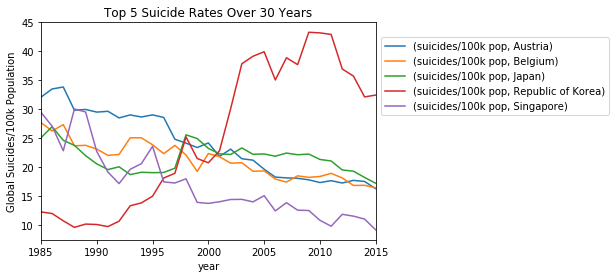

In [148]:
gy_top5.unstack().plot(legend=True,xlim =[1985,2015])
plt.title("Top 5 Suicide Rates Over 30 Years")
plt.ylabel("Global Suicides/100k Population")
plt.legend(loc="best", bbox_to_anchor=(1,.55))
plt.savefig("Output/Top_5_Suicide_Rates.png")

In [107]:
bottom_5_countries = countries[countries.country.isin(['Brazil','Colombia','Ecuador','Mexico','Greece'])]
bottom_5_countries

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Unnamed: 12,country.1,gdp_for_year_B
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,222943000000,1898,G.I. Generation,NaN,NaN,222.94
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,222943000000,1898,G.I. Generation,NaN,NaN,222.94
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,222943000000,1898,Silent,NaN,NaN,222.94
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,222943000000,1898,Boomers,NaN,NaN,222.94
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,222943000000,1898,Generation X,NaN,NaN,222.94
4177,Brazil,1985,female,75+ years,32,988100,3.24,Brazil1985,0.576,222943000000,1898,G.I. Generation,NaN,NaN,222.94
4178,Brazil,1985,female,55-74 years,148,5650100,2.62,Brazil1985,0.576,222943000000,1898,G.I. Generation,NaN,NaN,222.94
4179,Brazil,1985,female,25-34 years,269,10798700,2.49,Brazil1985,0.576,222943000000,1898,Boomers,NaN,NaN,222.94
4180,Brazil,1985,female,35-54 years,296,12185200,2.43,Brazil1985,0.576,222943000000,1898,Silent,NaN,NaN,222.94
4181,Brazil,1985,female,15-24 years,280,13751800,2.04,Brazil1985,0.576,222943000000,1898,Generation X,NaN,NaN,222.94


In [108]:
grouped_bottom5 = bottom_5_countries.groupby(['year','country'])

total_bottom5 = grouped_bottom5 ['suicides/100k pop'].mean()

gy_bottom5 = pd.DataFrame(total_bottom5)

gy_bottom5

suicides/100k pop
year country                    
1985 Brazil             4.931667
     Colombia           5.213333
     Ecuador            6.876667
     Greece             4.847500
     Mexico             3.180833
1986 Brazil             4.763333
     Colombia           4.175833
     Ecuador            6.378333
     Greece             5.100833
     Mexico             3.811667
1987 Brazil             5.843333
     Colombia           3.764167
     Ecuador            5.210833
     Greece             5.255000
     Mexico             3.452500
1988 Brazil             5.446667
     Colombia           4.220000
     Ecuador            6.274167
     Greece             5.010000
     Mexico             3.518333
1989 Brazil             5.335000
     Colombia           3.474167
     Ecuador            5.865000
     Greece             4.544167
     Mexico             4.021667
1990 Brazil             5.588333
     Colombia           3.619167
     Ecuador            5.040000
     Greece             4.290833
     Mexico             4.070833
...                          ...
2010 Brazil             6.060833
     Colombia           5.603333
     Ecuador            6.790833
     Greece             3.325000
     Mexico             5.084167
2011 Brazil             6.034167
     Colombia           5.240000
     Ecuador            6.816667
     Greece             4.056667
     Mexico             5.460000
2012 Brazil             6.204167
     Colombia           5.537500
     Ecuador            7.073333
     Greece             4.443333
     Mexico             5.285833
2013 Brazil             6.117500
     Colombia           5.294167
     Ecuador            5.240000
     Greece             4.592500
     Mexico             5.415833
2014 Brazil             6.094167
     Colombia           5.551667
     Ecuador            5.501667
     Greece             4.985000
     Mexico             5.698333
2015 Brazil             6.454167
     Colombia           5.866667
     Ecuador            8.115833
     Greece             4.671667
     Mexico             5.547500

[155 rows x 1 columns]

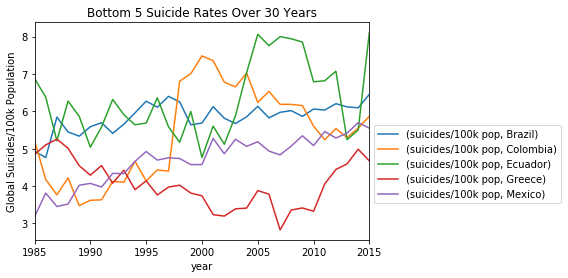

In [149]:
gy_bottom5.unstack().plot(legend=True,xlim =[1985,2015])
plt.title("Bottom 5 Suicide Rates Over 30 Years")
plt.ylabel("Global Suicides/100k Population")
plt.legend(loc = "best", bbox_to_anchor=(1,.55))
plt.savefig("Output/Bottom_5_Suicide_Rates.png")